<h1>

<img src="https://i.imgur.com/CNzsBzU.png" alt="logo" width="30%">

<h1>MC4AI | Math & Code for AI</h1>

<h2>Session 5 - Assignment</h2>

<h4>&copy;CoTAI. For Personal Use Only.</h4>

</h1>

#**Problem 1**

Dùng các hàm random của `numpy` để tạo dataset gồm 50 điểm dữ liệu có dạng đường thẳng như sau:

<img src=https://i.imgur.com/XNH9RYv.png width=300>

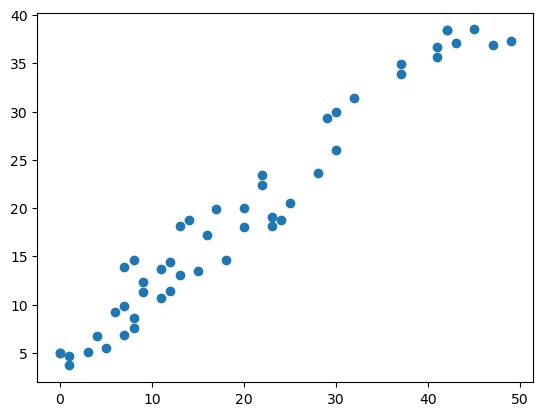

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE
np.random.seed(1)
def f(x):
    return .7*x+np.random.randint(2,10)

x = [np.random.randint(0,50) for i in range(50)]
fx = [f(z) for z in x]
plt.scatter(x,fx)
plt.show()

#**Problem 2**

Giả sử từ trường về nhà bạn mất `n` bước đi bộ. Bạn đi về nhà bằng cách tung đồng xu, nếu ra mặt sấp thì tiến `t` bước, nếu mặt ngửa thì lùi `k` bước (không lùi quá vạch xuất phát). Xác suất ra mặt sấp là `p`. Hỏi sau `m` lượt tung đồng xu bạn có thể về nhà không (nếu về nhà trước `m` lượt thì dừng) ?

**Input**
- Dòng 1: 4 số nguyên `m,n,t,k`
- Dòng 2: số thực `p`

**Output:** kết quả `Yes`/`No` và vị trí cuối cùng so với vạch xuất phát


<br>


**Test-case 1**
- Input
```
20 30 2 1
.5
```
- Output
```
No 8
```

**Test-case 2**
- Input
```
20 30 2 1
.9
```
- Output
```
Yes 30
```

**Test-case 3**
- Input
```
20 30 4 1
.5
```
- Output
```
No 26
```

**Test-case 4**
- Input
```
20 10 1 2
.5
```
- Output
```
No 0
```

In [94]:
import numpy as np
np.random.seed(22)

# YOUR CODE HERE
m,n,t,k = list(map(int, input().split()))
p = list(map(float, input().split()))

pos = 0
for i in range(m):
    pos += t if (np.random.binomial(1,p)>0)  else -k
    if pos<0: pos=0
    if pos>=n: break
if pos>=n:
    print(f"YES {pos}")
else: 
    print(f"No {pos}")


20 30 2 1 [0.9]
YES 30


#**Problem 3**

Tí & Tèo cá cược với nhau như sau: Từ trường về nhà đi bộ mất `d` bước, Tí & Tèo cùng nhau tung xúc xắc, mỗi lần tung hiện ra nút nào thì bước đi đúng bằng số nút đó. Sau `n` lần, ai tới nhà trước hoặc chưa tới nhà thì ai đi được xa hơn thì người đó thắng, nếu có ai tới nhà trước `n` lần chơi thì dừng luôn. Hãy dùng các hàm random của numpy để giả lập trò chơi của Tí & Tèo

**Input**
- Dòng 1: 2 số nguyên `d,n`
- Dòng 2: list 6 số thực cho biết xác suất xuất hiện các mặt của xúc xắc theo thứ tự từ 1-6

**Output**
- Dòng 1: Tên người thắng, nếu hoà thì in ra `Hòa`
- Dòng 2: list chứa lịch sử các bước đi của Tí
- Dòng 3: list chứa lịch sử các bước đi của Tèo

**Hướng dẫn:** dùng hàm `np.random.multinomial` với tham số `size=2` để mô phỏng mỗi lượt tung xúc xắc của Tí & Tèo

<br>

**Test-case 1**
- Input
```
20 5
.3 .1 .1 .1 .3 .1
```
- Output
```
Tí
2 8 9 14 19
1 5 10 15 16
```
- Giải thích:
  - Lần tung xúc xắc đầu tiên: Tí 2 nút, Tèo 1 nút
  - Lần 2: Tí 6 nút, Tèo 4 nút -> cộng dồn với lần đầu Tí đi được 8 bước, Tèo 5 bước
  - Lần 3: Tí 1 nút, Tèo 5 nút -> cộng dồn với 2 lần trước Tí đi được 9 bước, Tèo 10 bước
  - Tương tự cho 2 lần tung xúc xắc tiếp theo, kết quả Tí được 19 bước, Tèo 16 bước nên Tí thắng

**Test-case 2**
- Input
```
50 20
.1 .1 .1 .1 .2 .4
```
- Output
```
Tèo
2 7 13 19 20 24 26 29 35 40
6 12 18 20 26 32 34 40 44 50
```

**Test-case 3**
- Input
```
20 5
.1 .1 .3 .2 .3 .0
```
- Output
```
Tí
2 5 10 15 18
5 7 11 16 17
```

**Test-case 4**
- Input
```
20 10
.0 .0 .0 .1 .1 .8
```
- Output
```
Hòa
5 11 17 23
6 12 17 23
```

In [129]:
import numpy as np

# YOUR CODE HERE
# d,n = list(map(int, input().split()))
# p = list(map(float, input().split()))
d,n = 20, 5 
p = [.3, .1, .1, .1, .3, .1]


move = np.array([[],[]])
# print(d,n,p)
for i in range(n):
    xs = np.random.multinomial(1,p,size=2)
    move = np.append(move,np.array([[xs[0,].argmax()+1],[xs[1,].argmax()+1]]),axis=1)
    # print(move)
    if (move[0].sum() >= d) or ((move[1].sum() >= d)): 
        break
if (move[0].sum() > move[1].sum()):
    print('Tí')
elif (move[0].sum() < move[1].sum()):
    print('Tèo')
else:
    print('Hoà')
print(f'{move[0]}')
print(f'{move[1]}')

Tèo
[5. 2. 2. 1. 2.]
[4. 6. 2. 5. 4.]


#**Problem 4**

Sở Giáo Dục TPHCM tổ chức kiểm tra môn Tiếng Anh cho toàn bộ học sinh cấp ba. Số lượng học sinh tham gia là 10,000. Hãy giả lập số liệu kỳ thi này theo phân phối Gauss như sau:
- Điểm trung bình: 7
- Độ lệch chuẩn: 1.5

In [274]:
import numpy as np
np.random.seed(3)

# YOUR CODE HERE: tạo ra numpy array chứa điểm của 10000 học sinh theo phân phối Gauss
grades = np.random.normal(loc = 7, scale = 1.5, size=(10000,1))
grades

array([[9.68294271],
       [7.65476478],
       [7.1447462 ],
       ...,
       [8.11303087],
       [6.31642151],
       [7.63327908]])

Sửa lại những bài trên 10 thành 10 điểm (dùng hàm `numpy`, không dùng vòng lặp) sau đó làm tròn điểm về 0 số lẻ thập phân bằng hàm `np.round`

In [275]:
# YOUR CODE HERE
grades = np.where(grades>10,10,grades)
grades = np.round(grades,0)
grades

array([[10.],
       [ 8.],
       [ 7.],
       ...,
       [ 8.],
       [ 6.],
       [ 8.]])

Thống kê số lượng từng điểm số (0,1,...10) bằng hàm `np.unique` và vẽ đồ thị thống kê điểm số bằng hàm [**`bar`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) của `matplotlib`

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1, 12, 80, 412, 1139, 2203, 2577, 2081, 1035, 459]


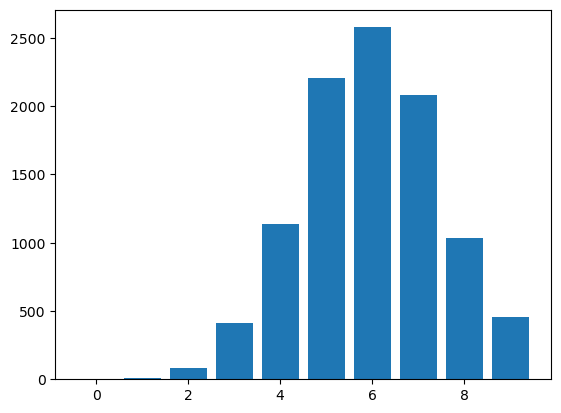

In [276]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
statistic = np.unique(grades)
print(statistic)
statistic = [np.count_nonzero(np.where(grades == statistic[x])) for x in range(len(statistic))]
print((statistic))
plt.bar([i for i in range(len(statistic))],statistic)
plt.show()

Tính xác suất từng điểm số và vẽ đồ thị bar của xác suất đó, kèm với đồ thị của hàm Gauss với $\mu=7, \sigma=1.5$ để biết bảng điểm tạo ra có tuân theo quy luật phân phối Gauss hay không

**Hướng dẫn cách tính xác suất:**
- Gọi $x$ là biến ngẫu nhiên lưu điểm số của học sinh, xác suất để $x=k, (k \in [0,10])$ được xác định bằng công thức $p(x=k) = \frac{n_k}{n}$, với $n$ là số lượng bài thi và $n_k$ là số lượng bài thi đạt điểm $k$
- Ví dụ: giả sử có 1000 bài thi, trong có 300 bài đạt điểm 6 $\Rightarrow n=1000, n_6=300, p(x=6)=\frac{300}{1000} = 30\% = 0.3$

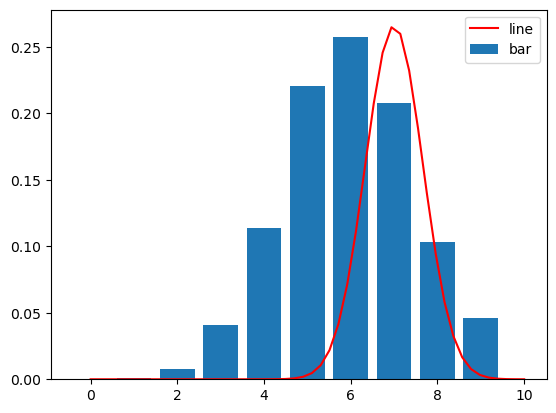

In [281]:
# YOUR CODE HERE
x = np.linspace(0,10)
mean = 7
sd = 1.5

def f(x,mean,sd):
    return (1/(sd*(2*np.pi)**.5))*np.exp(-(x-mean)**2/2*sd**2)

pstatistic = [statistic[x]/sum(statistic) for x in range(len(statistic))]
plt.bar([i for i in range(len(pstatistic))],pstatistic,label ="bar")
plt.plot(x,f(x,mean,sd),label ="line", c = 'red')
plt.legend()
plt.show()


#**Problem 5**

Tạo app Streamlit cho phép vẽ đồ thị của hàm mật độ phân phối Gauss có giao diện như hình dưới đây. Yêu cầu: tạo Github Repository & deploy public.

**Hướng dẫn**: xem mục **Streamlit Charts** trong S4: Post-Class ✍️ để biết cách vẽ đồ thị Matplotlib trên app Streamlit

<br>

<img src=https://i.imgur.com/KOyt8Wo.gif>

In [ ]:
# YOUR REPOSITORY LINK:
#https://github.com/nhducminh/
# YOUR PUBLIC LINK:
#https://github.com/nhducminh/CotAI.git

#**Problem 6** (Optional)

Vẽ đồ thị 3D của hàm phân phối chuẩn 2 biến. Cho trước vector trung bình $\mu$ và ma trận hiệp phương sai $\Sigma$

$$p(\boldsymbol{x}) = \frac{1}{(2\pi)^{(n/2)}|\Sigma|^{1/2}} \text{exp}(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu}))$$

**Hướng dẫn**:
- Xem mục **Multivariate Normal Distribution** trong S5: Post-Class ✍️
- Dùng hàm `np.linalg.det` để tính định thức của ma trận ($|\Sigma|$)
- Dùng hàm `np.linalg.pinv` để tính ma trận nghịch đảo ($\Sigma^{-1}$)

In [ ]:
import numpy as np
from numpy.linalg import det, pinv
import plotly.graph_objects as go

m = [0, 0]              # mean vector
s = [[1, 0], [0, 1]]    # covariance matrix

# YOUR CODE HERE
